

# Importintg needed librieres


In [ ]:
import pandas as pd #for data manipulation and analysis
import numpy as np #for performing mathematical operations
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns #creating statistical graphics
import warnings #is used to control the display of warning messages during execution
warnings.filterwarnings("ignore") #this command suppresses all warning messages during execution

# loading dataset


In [ ]:
data = pd.read_csv("/content/adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#Visualize dataset


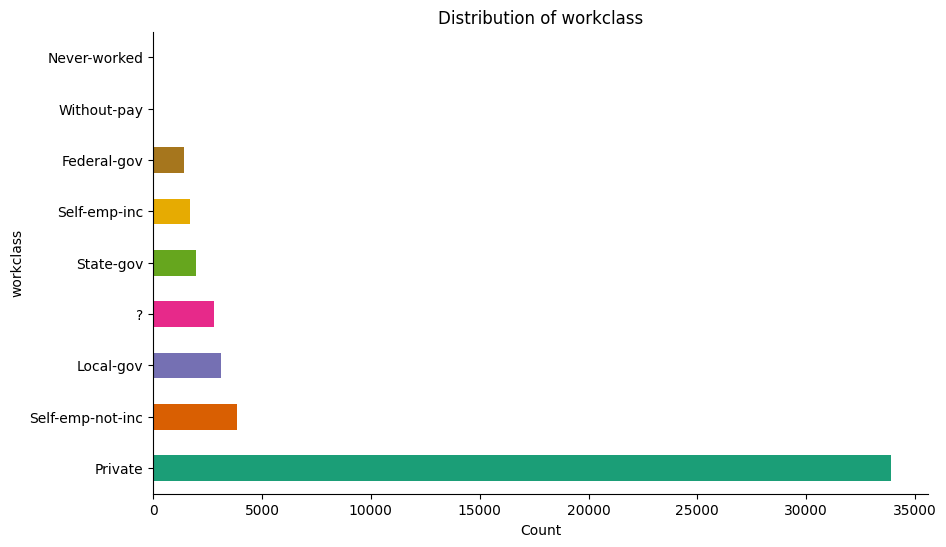

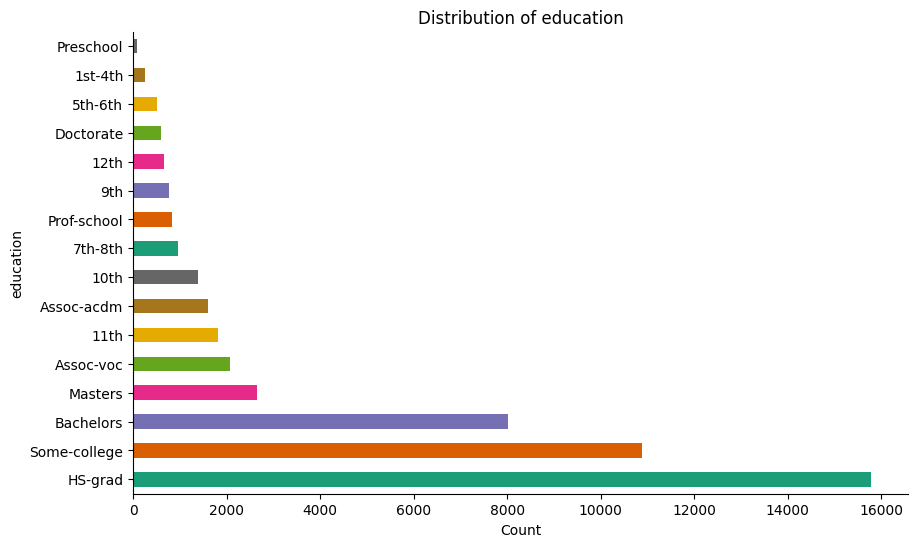

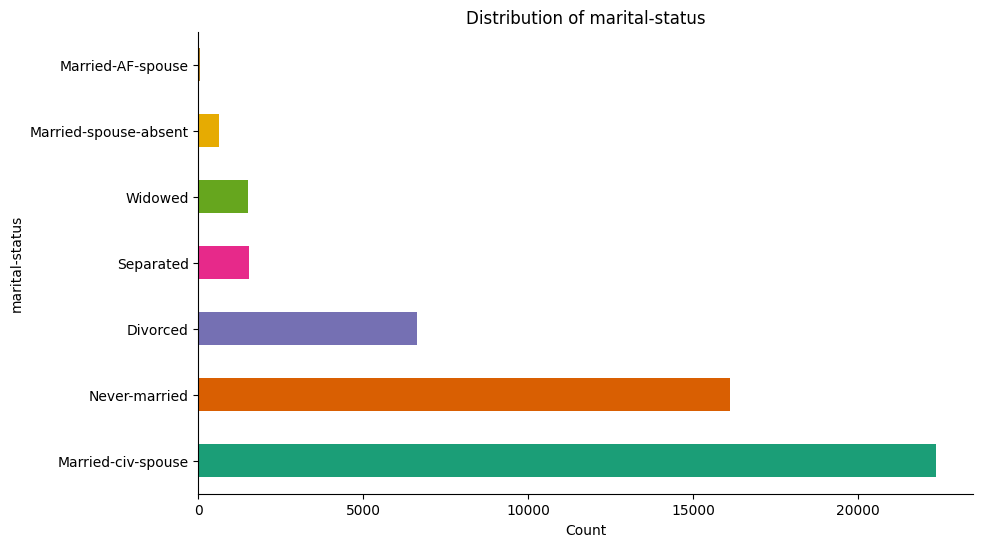

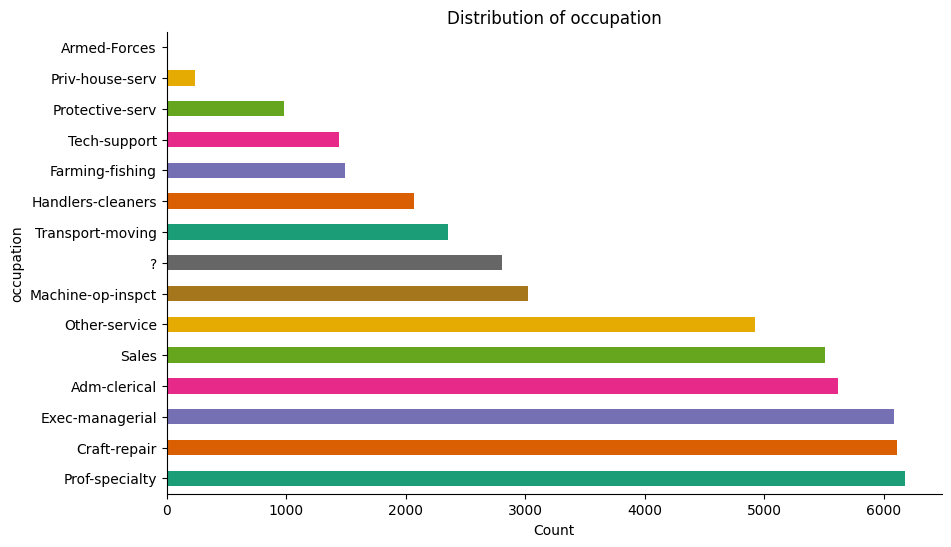

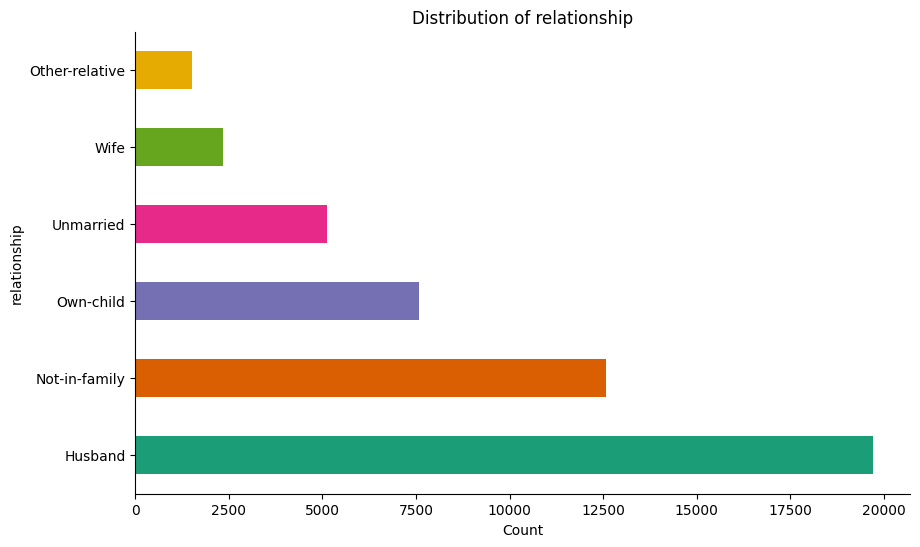

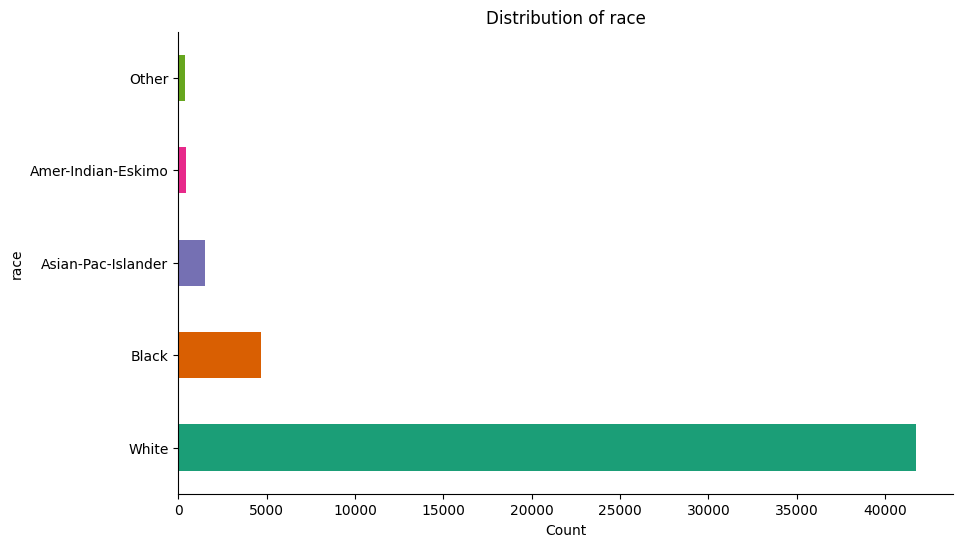

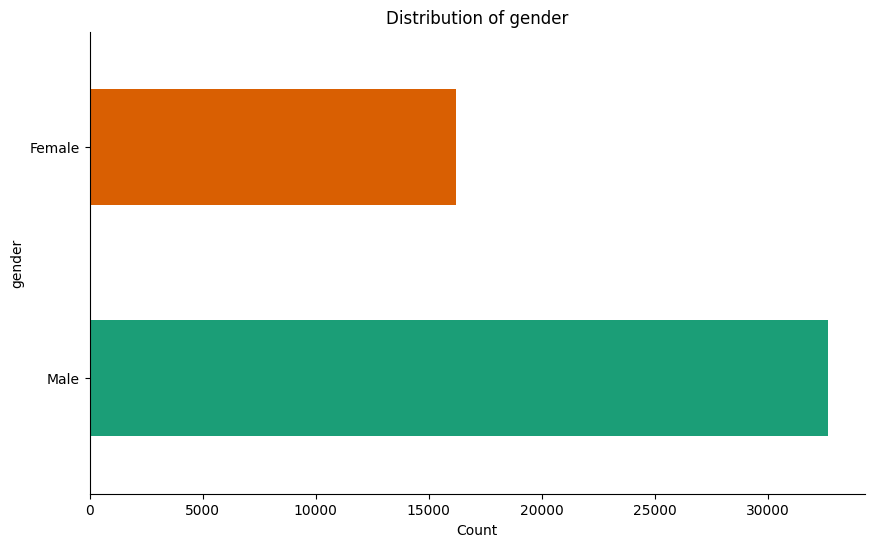

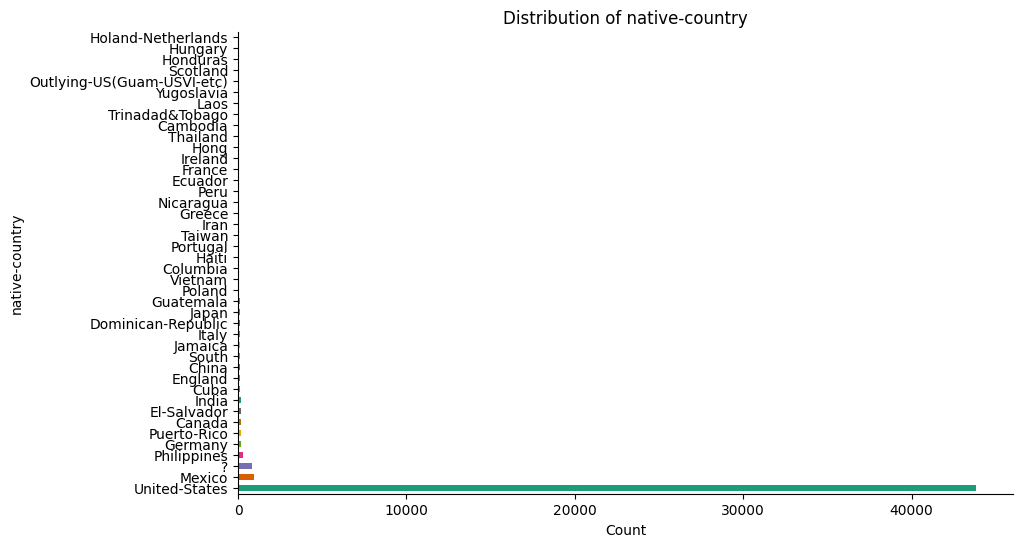

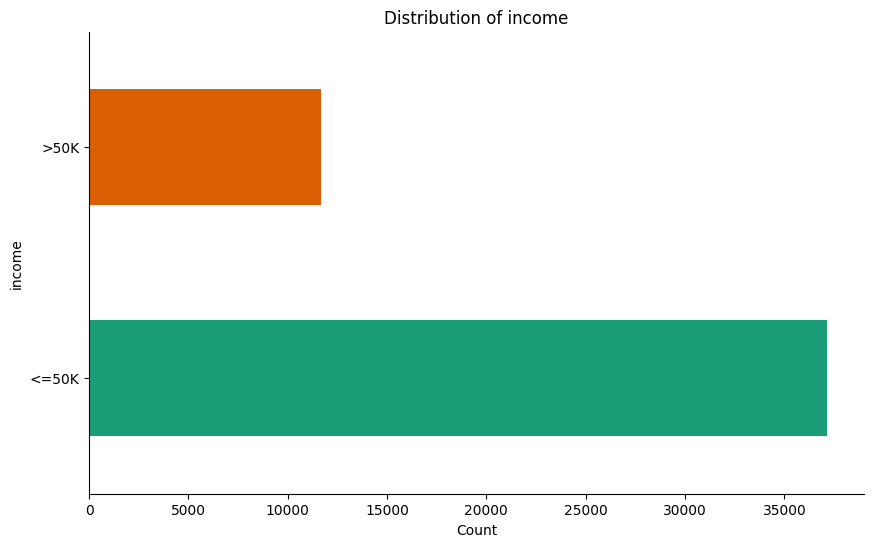

In [ ]:
import seaborn as sns

def visualize_categorical_distribution(data, categorical_columns):

    for column in categorical_columns:
        if data[column].dtype == 'object' or len(data[column].unique()) < 20:  # Assuming <20 unique values is categorical
            plt.figure(figsize=(10, 6))
            data[column].value_counts().plot(
                kind='barh',
                color=sns.color_palette('Dark2', n_colors=len(data[column].unique()))
            )
            plt.title(f"Distribution of {column}")
            plt.xlabel("Count")
            plt.ylabel(column)
            plt.gca().spines[['top', 'right']].set_visible(False)
            plt.show()


categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
visualize_categorical_distribution(data, categorical_columns)


# Data cleaning

In [ ]:
print(data.shape) #Print datashape , it has 14 features and 1 target feature with more than 48K intances

(48842, 15)


In [ ]:
data.isin(['?']).sum() # is there any '?' values , print the sum

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


**We found 3 clomuns [native-country , occupation ,workclass ] with ? values so replace the ? value with nan value **

In [ ]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

**Check For (missing , duplicted , unique ) Values**

In [ ]:
#creates a DataFrame (info)
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"]) #calculates the number of null (missing) values in each column of the data DataFrame.
info.insert(1,"Duplicate",data.duplicated().sum(),True) #Add column for duplicate counts
info.insert(2,"Unique",data.nunique(),True) #Add colunm for unique counts
info.T  #Transpose the DataFrame for better readability

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


**there are 52 duplicated row , amd 3 colmuns with null values**

In [ ]:
df = data.copy() #to work on data with the default values nan

**Remove missing values**

In [ ]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.shape


(45222, 15)

**notice that the inctances decreaed since we removed nill values it 48K instnces now they are 45K**

In [ ]:
#Remove duplicates
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#'education' & 'educational-num' both columns have similer values but each in diffrent datatype
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

Text(0.5, 1.0, 'Histogram')

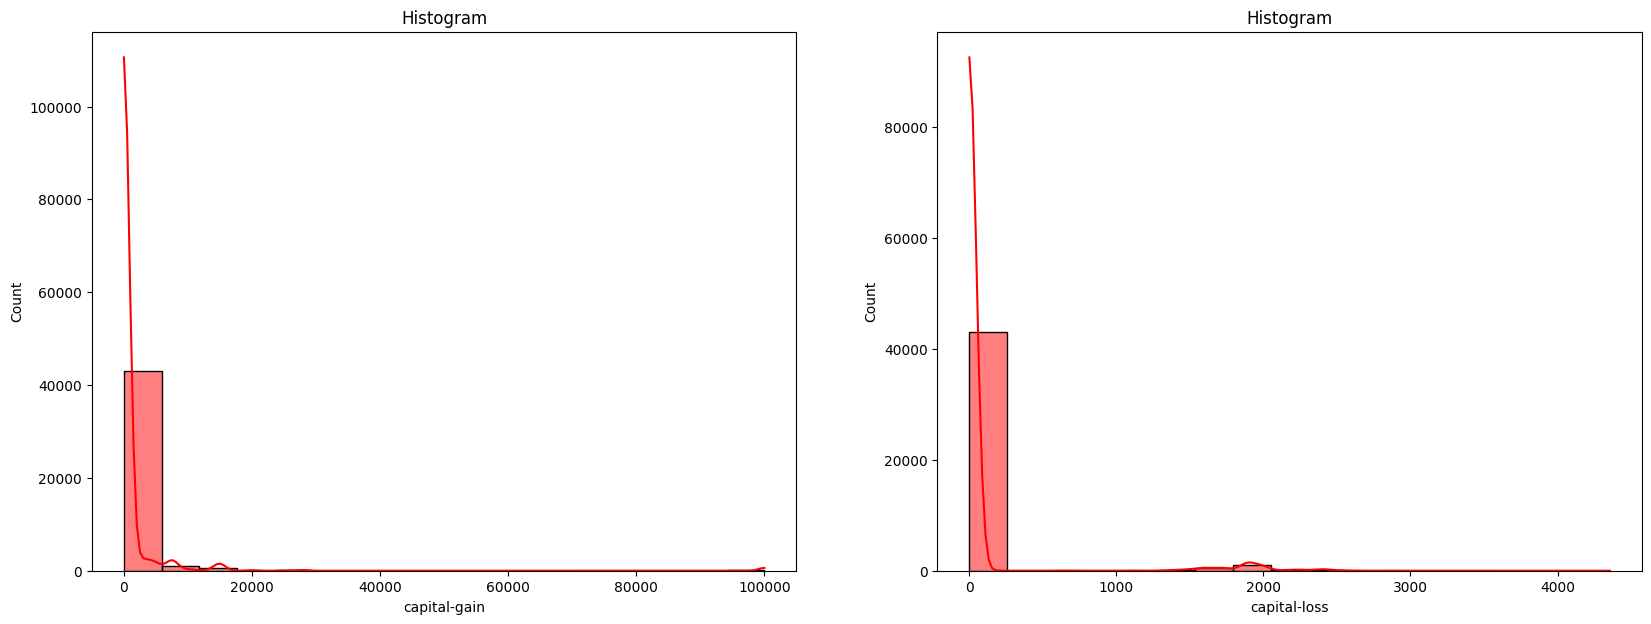

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

**defintion** :
- Variance measures how much the values in a column differ.
-If most of the values in a column are the same the column has low variance.
-and KNN is sensitive to irrelevant information (Curse of Dimensionality)

we remove 'education-num' column since id does not provide useful information and we will remove capital-gain, and capital-loss columns since they are Columns with low variance which provide no useful information for distinguishing between data points. and both columns have mostly data as 0 ,

In [ ]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

**Convert categorical columns to numerical using LableEncoder**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['workclass'] = label_encoder.fit_transform(df1['workclass'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['marital-status'] = label_encoder.fit_transform(df1['marital-status'])
df1['occupation'] = label_encoder.fit_transform(df1['occupation'])
df1['relationship'] = label_encoder.fit_transform(df1['relationship'])
df1['race'] = label_encoder.fit_transform(df1['race'])
df1['native-country'] = label_encoder.fit_transform(df1['native-country'])
df1['income'] = label_encoder.fit_transform(df1['income'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#creates a DataFrame (info)
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"]) #calculates the number of null (missing) values in each column of the data DataFrame.
info.insert(1,"Duplicate",df1.duplicated().sum(),True) #Add column for duplicate counts
info.insert(2,"Unique",df1.nunique(),True) #Add colunm for unique counts
info.T  #Transpose the DataFrame for better readability

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,8,8,8,8,8,8,8,8,8,8,8,8
Unique,74,7,26741,16,7,14,6,5,2,96,41,2


In [ ]:
df1.drop_duplicates(inplace=True)

# KNN Model

In [ ]:
from sklearn.model_selection import train_test_split #Splits the dataset into training and testing subsets.
# KNN
from sklearn.neighbors import KNeighborsClassifier #Implements the KNN algorithm.
from sklearn.model_selection import GridSearchCV  #Perform hyperparameter tuning 'K' by exhaustively searching over a specified parameter grid.
from sklearn.model_selection import cross_val_score # Evaluates a model's performance using cross-validation.
from sklearn import metrics #evaluate model performance.

In [ ]:
# split Data
X = df1.drop(columns={"income"},axis=1)
y =df1["income"] #target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40657, 11)
y_train shape: (40657,)
X_test shape: (4518, 11)
y_test shape: (4518,)


**Data scaling**   

 KNN is a distance-based algorithm. The algorithm works by calculating the distances (typically Euclidean distance) between data points to determine the "nearest neighbors." If the features are on different scales, the features with larger ranges will dominate the distance calculation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [ ]:
#Find Best K
K = 20
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'accuracy vs K')

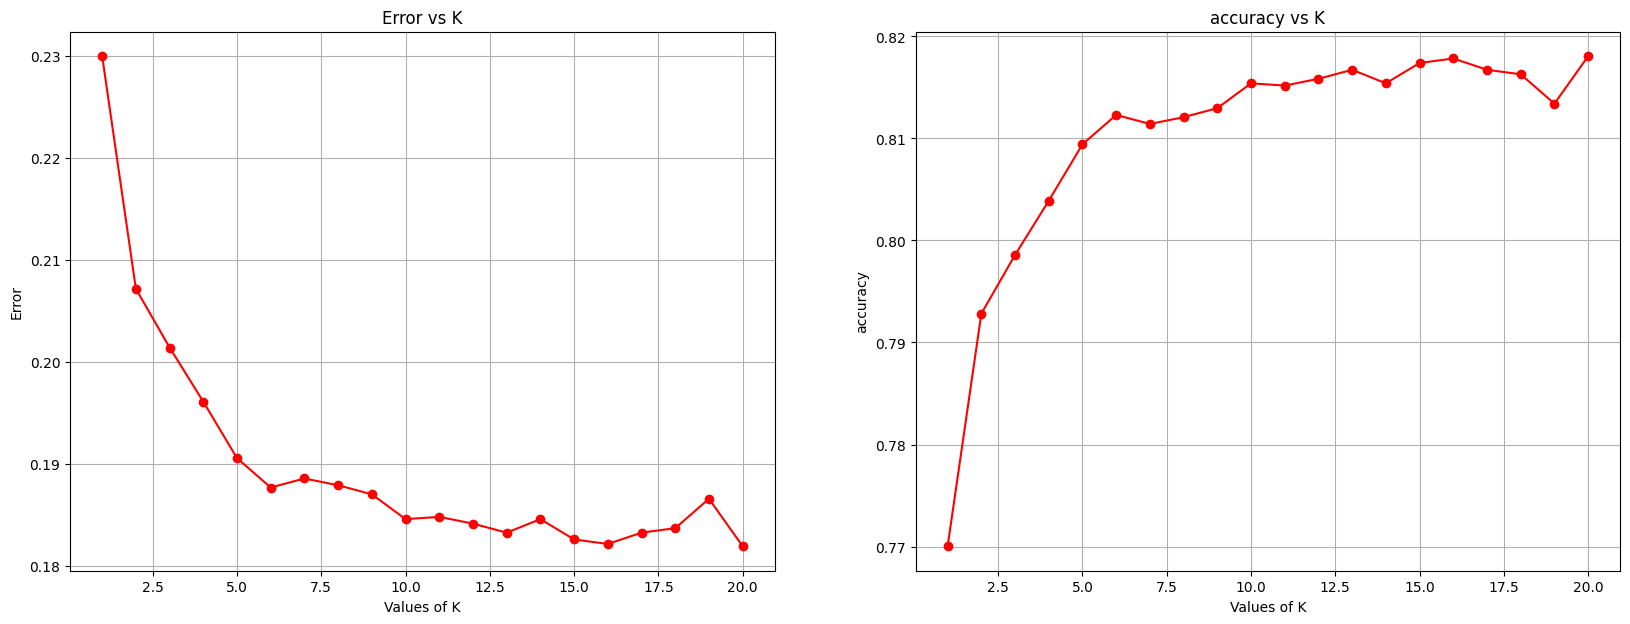

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,21),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,21),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

In [ ]:
K=20 # is the best value since it recorded the lowest error and the highest accurcy
clf= KNeighborsClassifier(K)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
# Training accuracy
train_accuracy = clf.score(X_train, y_train) * 100
print(f"Training Accuracy: {train_accuracy}%")


# Model prediction on test data
y_pred = clf.predict(X_test)

# Test accuracy
test_accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {test_accuracy}%")

Training Accuracy: 83.58708217527116%
Test Accuracy: 81.80610889774236%


In [ ]:
#Find Best K with cross validation to minmize overfitting

parameters = {"n_neighbors":range(1,30)}
grid_kn=GridSearchCV(estimator=knn,#model
                     param_grid=parameters, #range of K
                    scoring='accuracy',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 5, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 #Help to cpu
                    )
grid_kn.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy',
             verbose=1)

In [ ]:
grid_kn.best_params_



{'n_neighbors': 22}

In [ ]:
K=22 # is the best value since it recorded the lowest error and the highest accurcy
clf= KNeighborsClassifier(K)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred)*100)

Accuracy : 82.0274457724657


# Report results

In [ ]:
# Model fitting on training data
clf = KNeighborsClassifier(n_neighbors=22)
clf.fit(X_train, y_train)

# Training accuracy
train_accuracy = clf.score(X_train, y_train) * 100
print(f"Training Accuracy: {train_accuracy}%")


# Model prediction on test data
y_pred = clf.predict(X_test)

# Test accuracy
test_accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {test_accuracy}%")

Training Accuracy: 83.56494576579678%
Test Accuracy: 82.0274457724657%


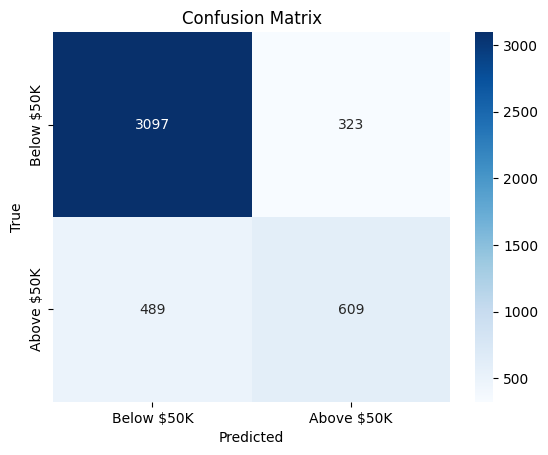

[[3097  323]
 [ 489  609]]


In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below $50K', 'Above $50K'], yticklabels=['Below $50K', 'Above $50K'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
print(cm)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3420
           1       0.65      0.55      0.60      1098

    accuracy                           0.82      4518
   macro avg       0.76      0.73      0.74      4518
weighted avg       0.81      0.82      0.82      4518



#Classification Report Breakdown:

Precision, Recall, F1-Score for each class:

Class 0 (label = 0):

- Precision (0.86): Of all the instances predicted as class 0, 86% are actually class 0.

- Recall (0.91): Of all the true class 0 instances, 91% are correctly identified by the model.
- F1-Score (0.88): The harmonic mean of precision and recall, balancing both metrics.

Class 1 (label = 1):
- Precision (0.65): Of all the instances predicted as class 1, 65% are actually class 1.
- Recall (0.55): Of all the true class 1 instances, 55% are correctly identified by the model.
- F1-Score (0.60): Again, the harmonic mean of precision and recall for class 1.

Accuracy:

The accuracy  is 82%, meaning the model correctly predicted the label for 82% of the instances across both classes.

Macro Average:

Precision (0.76), Recall (0.73), and F1-Score (0.74) are averages across both classes without considering class imbalance.
Weighted Average:

Precision (0.81), Recall (0.82), and F1-Score (0.82) are weighted averages considering the class distribution, giving more weight to the majority class (class 0).


The confusion matrix :

True Negatives (3097): Instances that are actually class 0 and predicted as class 0.

False Positives (323): Instances that are actually class 0 but predicted as class 1.

False Negatives (489): Instances that are actually class 1 but predicted as class 0.

True Positives (609): Instances that are actually class 1 and predicted as class 1.


Interpretation:

Class 0 (the majority class) is well-predicted with high precision and recall.
Class 1 (the minority class) is less accurately predicted. Precision and recall are lower for class 1, indicating that the model struggles more to correctly classify instances of class 1.